In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

In [3]:
df_ref = pd.read_csv('../output/data/path_redundancy_undivided_low.csv', sep=',', header=0)
df_ref = df_ref.rename(columns={'Unnamed: 0':'Pair ID'}).set_index('Pair ID', drop=True)
df_ref

,Source,Dest,Number of SP,SP length,Disparity
Pair ID,,,,,
0,0,1,4,6,0.444444
1,0,2,8,6,0.428571
2,0,5,22,6,0.564214
3,0,6,4,4,0.583333
4,0,7,2,4,0.500000
...,...,...,...,...,...
4063,95,97,2,4,0.500000
4064,95,98,1,6,0.000000
4065,96,97,1,5,0.000000


In [11]:
df_mdrw = pd.read_csv('../output/data/path_redundancy_MDRW_low_rep30.csv', sep=',', header=0)
df_mdrw = df_mdrw.rename(columns={'Unnamed: 0':'Pair ID'}).set_index('Pair ID', drop=True)
df_mdrw.head()

,Source,Dest,Number of SP,SP length,Disparity
Pair ID,,,,,
0,88,91,1,1,0.000000
1,88,64,1,2,0.000000
2,88,82,1,2,0.000000
3,88,93,8,7,0.459184
4,88,38,12,6,0.500000


In [7]:
df_ffd = pd.read_csv('../output/data/path_redundancy_FFD_low_rep30.csv', sep=',', header=0)
df_ffd = df_ffd.rename(columns={'Unnamed: 0':'Pair ID'}).set_index('Pair ID', drop=True)
df_ffd.head()

,Source,Dest,Number of SP,SP length,Disparity
Pair ID,,,,,
0,59,17,1,1,0.00
1,59,11,2,2,1.00
2,59,98,2,2,1.00
3,59,62,2,4,0.50
4,59,28,5,6,0.45


In [8]:
df_rnd = pd.read_csv('../output/data/path_redundancy_RND_low_rep30.csv', sep=',', header=0)
df_rnd = df_rnd.rename(columns={'Unnamed: 0':'Pair ID'}).set_index('Pair ID', drop=True)
df_rnd.head()

,Source,Dest,Number of SP,SP length,Disparity
Pair ID,,,,,
0,0,1,4,6,0.444444
1,0,2,8,6,0.428571
2,0,5,22,6,0.564214
3,0,6,4,4,0.583333
4,0,7,2,4,0.500000


Text(0.5, 1.0, 'Shortest path length distribution')

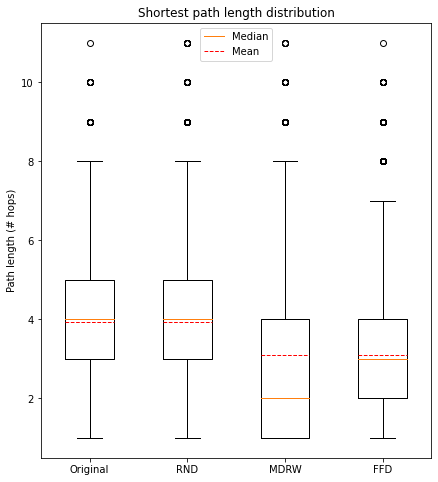

In [15]:
fig,ax = plt.subplots(figsize=(7,8))

bp = ax.boxplot([df_ref['SP length'].tolist(), 
                 df_rnd['SP length'].tolist(),  
                 df_mdrw['SP length'].tolist(),
                 df_ffd['SP length'].tolist()], 
            vert=True, 
            widths=0.5,
            meanline=True, 
            showmeans=True, 
            meanprops={'color':'red','ls':'--'}
            )
ax.legend([bp['medians'][0], bp['means'][0]], ['Median', 'Mean'])
ax.set_xticklabels(['Original','RND', 'MDRW', 'FFD']) 
ax.set_ylabel('Path length (# hops)')
ax.set_title('Shortest path length distribution')
#ax.set_xlabel('Node degree')

Text(0.5, 1.0, 'Path disparity distribution')

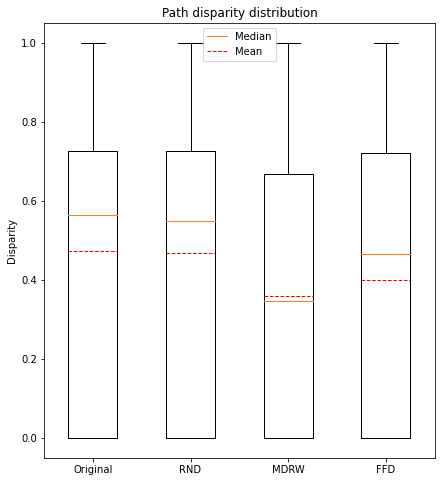

In [16]:
fig,ax = plt.subplots(figsize=(7,8))

bp = ax.boxplot([df_ref['Disparity'].tolist(), 
                 df_rnd['Disparity'].tolist(),  
                 df_mdrw['Disparity'].tolist(),
                 df_ffd['Disparity'].tolist()], 
            vert=True, 
            widths=0.5,
            meanline=True, 
            showmeans=True, 
            meanprops={'color':'red','ls':'--'}
            )
ax.legend([bp['medians'][0], bp['means'][0]], ['Median', 'Mean'])
ax.set_xticklabels(['Original','RND', 'MDRW', 'FFD']) 
ax.set_ylabel('Disparity')
ax.set_title('Path disparity distribution')

In [57]:
pairs_ref_25 = df_ref['Likelihood < 25'].sum()
pairs_div_25 = df_div['Likelihood < 25'].sum()

In [58]:
df_ref['Proportion < 25'] = df_ref['Likelihood < 25'] / pairs_ref_25
df_ref

,Source,Dest,Shortest path length,Cutoff length,Not-too-long paths,Efficient paths,Likelihood < 50,Likelihood < 34,Likelihood < 25,Proportion < 25
Pair ID,,,,,,,,,,
0,0,1,6,8,3177,2765,1666,685,101,0.000060
1,0,2,6,8,2131,1903,1229,475,144,0.000085
2,0,5,6,8,7623,6713,5564,3812,1066,0.000630
3,0,6,4,6,664,538,447,259,259,0.000153
4,0,7,4,6,232,202,144,61,61,0.000036
...,...,...,...,...,...,...,...,...,...,...
3318,95,97,4,6,368,302,209,61,61,0.000036
3319,95,98,6,8,582,499,308,155,34,0.000020
3320,96,97,5,7,381,318,123,40,40,0.000024


In [59]:
df_div['Proportion < 25'] = df_div['Likelihood < 25'] / pairs_div_25
df_div

,Source,Dest,Shortest path length,Cutoff length,Not-too-long paths,Efficient paths,Likelihood < 50,Likelihood < 34,Likelihood < 25,Proportion < 25
Pair ID,,,,,,,,,,
0,72,80,1,3,26,12,12,12,12,0.000193
1,72,66,2,4,219,176,176,122,122,0.001960
2,72,42,2,4,338,277,277,214,214,0.003438
3,72,90,2,4,283,233,233,144,144,0.002314
4,72,69,3,5,2014,1756,1590,1590,878,0.014107
...,...,...,...,...,...,...,...,...,...,...
296,88,58,1,3,9,9,9,9,9,0.000145
297,88,91,1,3,8,7,7,7,7,0.000112
298,89,58,1,3,9,9,9,9,9,0.000145


(0.0, 0.01)

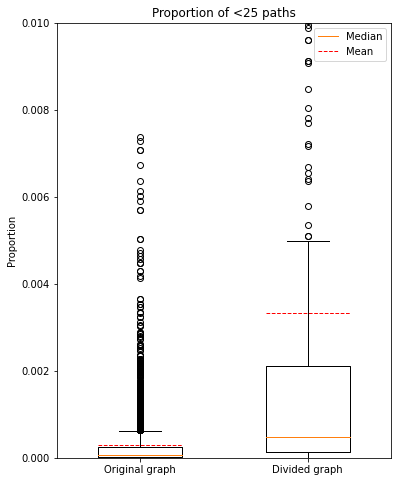

In [63]:
fig,ax = plt.subplots(figsize=(6,8))

bp = ax.boxplot([df_ref['Proportion < 25'].tolist(), df_div['Proportion < 25'].tolist()], 
            vert=True, 
            widths=0.5,
            meanline=True, 
            showmeans=True, 
            meanprops={'color':'red','ls':'--'}
            )
ax.legend([bp['medians'][0], bp['means'][0]], ['Median', 'Mean'])
ax.set_xticklabels(['Original graph','Divided graph']) 
ax.set_ylabel('Proportion')
ax.set_title('Proportion of <25 paths')
ax.set_ylim((0,0.01))

In [88]:
df_div['Likelihood < 25'].median()

30.0